In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\Datascience_code\Dataset\Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [5]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [7]:
df.size

2000

In [8]:
df.shape

(400, 5)

In [9]:
df = df.drop(['User ID'],axis=1)

In [10]:
df= df.drop(['Gender'],axis=1)

In [11]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
x = df['Age']
y= df['EstimatedSalary']

In [13]:
corr = df.corr()

In [14]:
corr

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


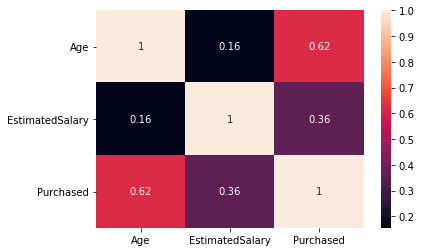

In [15]:
sns.heatmap(corr,annot=True)
plt.show()

In [16]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [17]:
col1 =['Age','EstimatedSalary']
x=df[col1]

In [18]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [39]:
x.shape

(400, 2)

In [19]:
col2 = df['Purchased']
y.head()

0    19000
1    20000
2    43000
3    57000
4    76000
Name: EstimatedSalary, dtype: int64

In [20]:
print(x.shape)

(400, 2)


In [21]:
print(y.shape)

(400,)


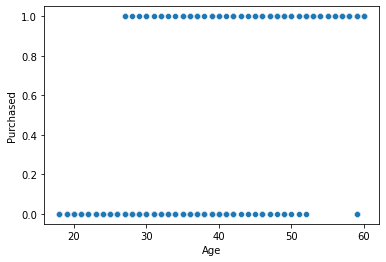

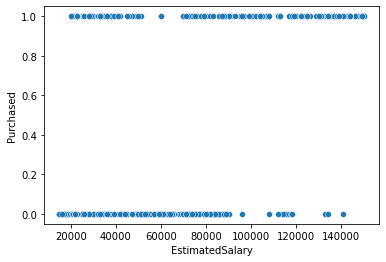

In [22]:
for i in col1:
    sns.scatterplot(x=i,y='Purchased',data=df)
    plt.show()

In [23]:
 from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [24]:
from sklearn.compose import ColumnTransformer

In [25]:
encoder = ColumnTransformer([('sc',StandardScaler(),[0,1])],remainder='passthrough')

In [26]:
newdata = encoder.fit_transform(x)

In [27]:
pd.DataFrame(newdata).head()

,0,1
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [28]:
from sklearn.model_selection import train_test_split

In [49]:
xtrain,xtest,ytrain,ytest = train_test_split(newdata,y,train_size=.7)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression()


In [52]:
model.fit(xtrain,ytrain)


LogisticRegression()

In [62]:
ypred=model.predict(xtest)

In [63]:
from sklearn.metrics import accuracy_score

In [61]:
print(accuracy_score(ytest,ypred))

0.03333333333333333


In [58]:
from sklearn import metrics

In [59]:
print(metrics.confusion_matrix(ytest,ypred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
